In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load the data
data = pd.read_csv('../data/labeled_data.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
texts, target = data['tweet'], data['class']
texts_target = data[['tweet', 'class']]

In [4]:
import string
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer

# Inicializa o lemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')  # Para outras línguas, se necessário

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
class PreproTweets(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return [self.preprocess_text(text) for text in X]

    def preprocess_text(self, text):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'\b\w{1,2}\b', '', text)  
        text = re.sub(r'[^\w\s]', '', text) 
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
        return text


In [68]:
# Exemplo de pipeline com pré-processamento e TF-IDF
pipeline = Pipeline([
    ('prepro', PreproTweets()),
    ('tfidf', TfidfVectorizer()),
    ('nmf', NMF(n_components=10, random_state=42)),  # Adiciona NMF com 100 componentes
])

In [69]:
pipeline.fit(texts)

Pipeline(steps=[('prepro', PreproTweets()), ('tfidf', TfidfVectorizer()),
                ('nmf', NMF(n_components=10, random_state=42))])

In [70]:
X, y = texts, target

In [71]:
X_processed = pipeline.transform(X)

In [72]:
X_processed_sample = pd.DataFrame(X_processed).sample(6_000, random_state=42)
y_sample = y[X_processed_sample.index]

In [73]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=15)
X_tsne = tsne.fit_transform(X_processed_sample)

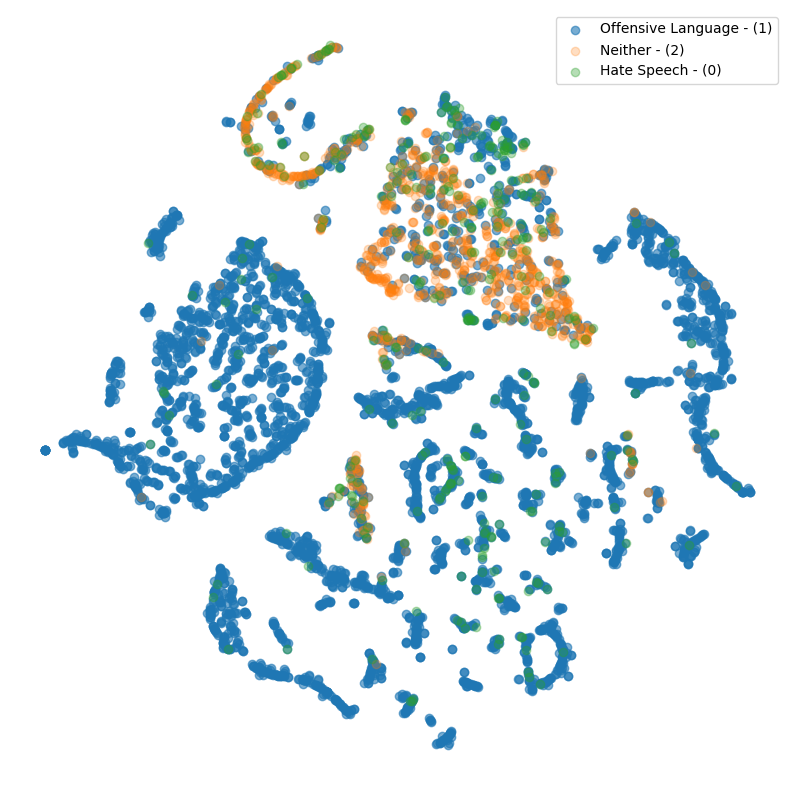

In [74]:
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0][y_sample == 1], X_tsne[:, 1][y_sample == 1], label='Offensive Language - (1)', alpha=0.6)
plt.scatter(X_tsne[:, 0][y_sample == 2], X_tsne[:, 1][y_sample == 2], label='Neither - (2)', alpha=0.25)
plt.scatter(X_tsne[:, 0][y_sample == 0], X_tsne[:, 1][y_sample == 0], label='Hate Speech - (0)', alpha=0.35)
plt.legend()
plt.axis('off')
plt.show()

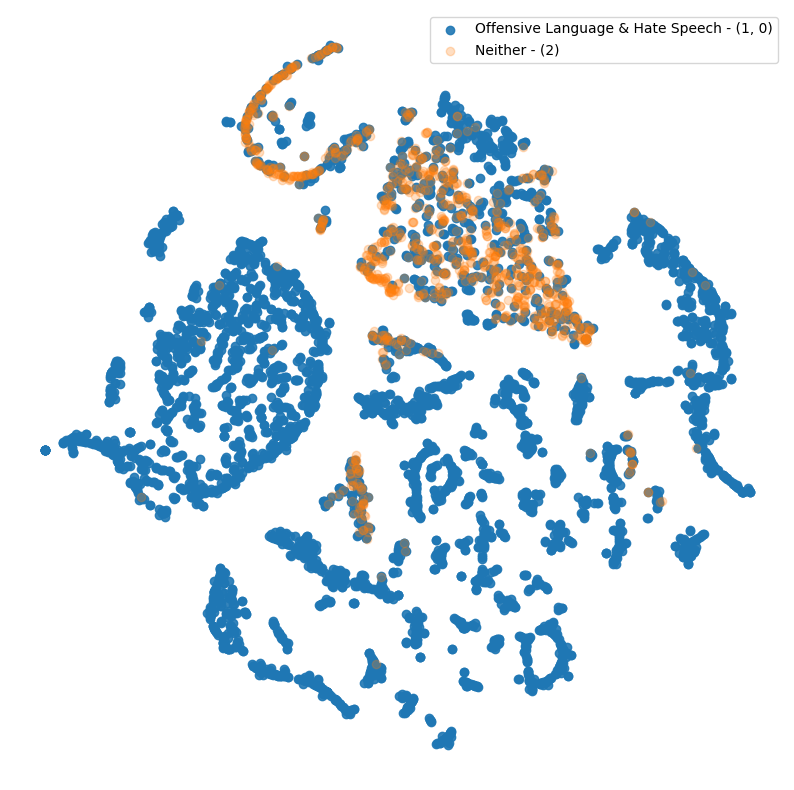

In [75]:
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0][(y_sample == 1) | (y_sample == 0)], 
            X_tsne[:, 1][(y_sample == 1) | (y_sample == 0)], 
            label='Offensive Language & Hate Speech - (1, 0)', alpha=0.9)
plt.scatter(X_tsne[:, 0][y_sample == 2], X_tsne[:, 1][y_sample == 2], label='Neither - (2)', alpha=0.25)
plt.legend()
plt.axis('off')
plt.show()

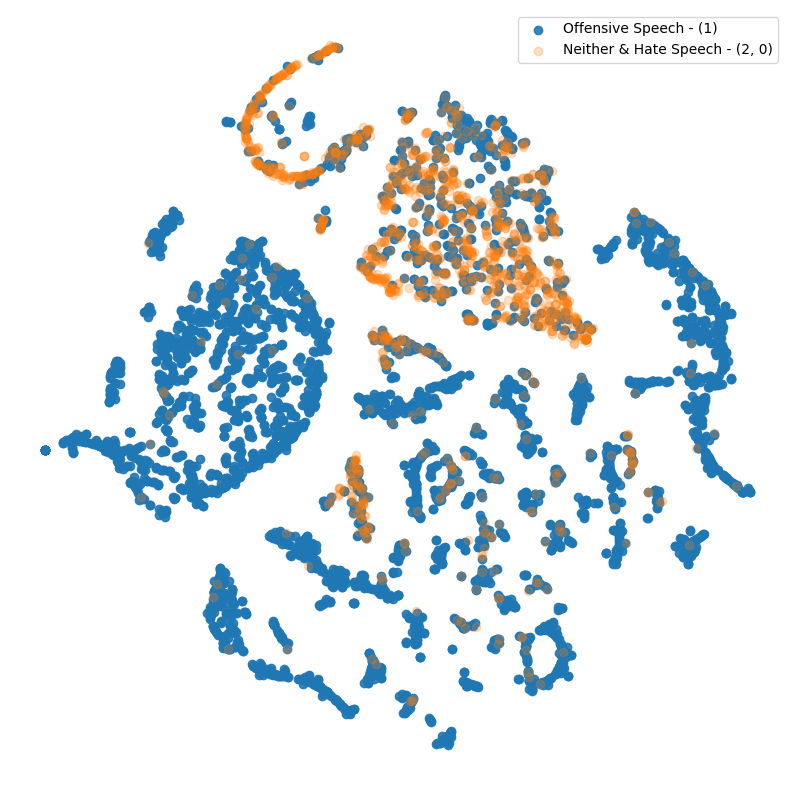

In [80]:
plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0][y_sample == 1], X_tsne[:, 1][y_sample == 1], label='Offensive Speech - (1)', alpha=0.9)
plt.scatter(X_tsne[:, 0][(y_sample == 2) | (y_sample == 0)], 
            X_tsne[:, 1][(y_sample == 2) | (y_sample == 0)], 
            label='Neither & Hate Speech - (2, 0)', alpha=0.25)
plt.legend()
plt.axis('off')
plt.show()